In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import keras
from PIL import Image

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/My\ Drive/Kaggle/chest_xray.zip

Archive:  gdrive/My Drive/Kaggle/chest_xray.zip
replace chest_xray/chest_xray/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
from tensorflow.keras.utils import to_categorical

# Creating the training folders
train_Normal = 'chest_xray/chest_xray/train/NORMAL/'
train_Pneumonia = 'chest_xray/chest_xray/train/PNEUMONIA/'


# Seeing how many photos of normal chest X-rays and pneumonia photos are available in the test folders 
print('Normal Training size :', len(os.listdir(train_Normal) ))
print('Pneumonia Training size :', len(os.listdir(train_Pneumonia)))



Normal Training size : 1342
Pneumonia Training size : 3876


Text(0.5, 1.0, 'Pneumonia')

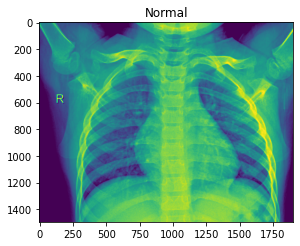

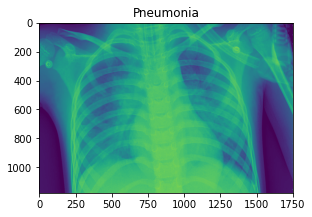

In [ ]:
pic = os.listdir(train_Normal)[30] # Picking an image from the normal xrays
pic2 = os.listdir(train_Pneumonia)[23] # Picking an image from the pneumonia xrays

pic_address = train_Normal + pic # Address of the directory
pic_load = Image.open(pic_address) # Loading image

pic2_address = train_Pneumonia + pic2 # Address of the directory
pic2_load = Image.open(pic2_address) # Loading image

# Ploting image of normal X-rays
f1 = plt.figure(figsize=(10,6))
a1 = f1.add_subplot(1,2,1)
img_plot = plt.imshow(pic_load)
a1.set_title('Normal')

# Ploting image of pneumonia X-rays
f2 = plt.figure(figsize=(10,6))
a2 = f2.add_subplot(1,2,1)
img_plot = plt.imshow(pic2_load)
a2.set_title('Pneumonia')


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, Activation
from tensorflow import keras as keras

In [ ]:
image_height = 300
image_width = 300
num_epochs = 10 
 
model = Sequential() # Creating our model in a sequential order of layers 


model.add(Conv2D(32, (5, 5),  activation='relu', input_shape=(image_height, image_width, 3)))
'''
 32 filters 
 kernal size is 3x3 
 padding is set to same so that output value size is the same as input volum size 
 activation function relu 
'''
model.add(MaxPool2D(pool_size=(2, 2)))

'''
 Will downscale by 2 by 2
'''

model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))


model.add(Conv2D(32, (5,5), activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(32, (5, 5),  activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))          


model.add(Flatten()) # Bringing all levels down into one plain

model.add(Dense(512, activation='relu'))

model.add(Dense(128, activation='selu'))

model.add(Dense(2, activation='softmax'))



model.summary()

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 296, 296, 32)      2432      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 148, 148, 32)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 144, 144, 32)      25632     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 72, 72, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 68, 68, 32)        25632     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 34, 34, 32)      

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Generates image data and allow for changes to be made to images

train_datagen = ImageDataGenerator(rescale= 1./255) # Rescale the images
training_generator = train_datagen.flow_from_directory('chest_xray/chest_xray/train/',
                                                 target_size = (300,300),
                                                 batch_size = 10,) # This allows us to take images from the data set

test_datagen = ImageDataGenerator(rescale= 1./255) # Rescale the images
test_generator = test_datagen.flow_from_directory('chest_xray/chest_xray/test/',
                                                 target_size = (300,300),
                                                 batch_size = 10,) # This allows us to take images from the data set

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
history = model.fit(training_generator, steps_per_epoch=len(training_generator)//10, epochs=8, validation_data=test_generator, validation_steps=len(test_generator)//10)

Epoch 1/8
52/52 [==============================] - 9s 172ms/step - loss: 0.0798 - accuracy: 0.9731 - val_loss: 0.9931 - val_accuracy: 0.7667
Epoch 2/8
52/52 [==============================] - 9s 167ms/step - loss: 0.0474 - accuracy: 0.9885 - val_loss: 0.5482 - val_accuracy: 0.8500
Epoch 3/8
52/52 [==============================] - 8s 160ms/step - loss: 0.0504 - accuracy: 0.9865 - val_loss: 1.5325 - val_accuracy: 0.7500
Epoch 4/8
52/52 [==============================] - 9s 165ms/step - loss: 0.0477 - accuracy: 0.9846 - val_loss: 1.0339 - val_accuracy: 0.7667
Epoch 5/8
52/52 [==============================] - 9s 166ms/step - loss: 0.0362 - accuracy: 0.9885 - val_loss: 0.7898 - val_accuracy: 0.8000
Epoch 6/8
52/52 [==============================] - 8s 162ms/step - loss: 0.0792 - accuracy: 0.9750 - val_loss: 0.8612 - val_accuracy: 0.7500
Epoch 7/8
52/52 [==============================] - 9s 175ms/step - loss: 0.0706 - accuracy: 0.9692 - val_loss: 0.6822 - val_accuracy: 0.8167
Epoch 8/8
52/

In [ ]:
test_accu = model.evaluate(test_generator)
print('The testing accuracy is :', test_accu[1]*100, '%')

63/63 [==============================] - 8s 122ms/step - loss: 0.8974 - accuracy: 0.8189
The testing accuracy is : 81.89102411270142 %
